# First thing first
Let's load the data:

In [1]:
# The code was removed by Watson Studio for sharing.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Loads the test data:
body = client_acbe173e64eb46b88230516bff459abd.get_object(Bucket='notebooksfortitaniccompetition-donotdelete-pr-i1laynbg8qhrl3',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test_data = pd.read_csv(body)
test_data.head()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Imports libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

# Preprocess the data:
Let's make the data more useful

__Make a combination of the train data and test data so we can take a closer look on the data__

In [4]:
# Inserts 'Survived' column to test data
import pandas as pd
test_data.insert(1, 'Survived', pd.Series([None] * len(test_data.index)))

In [5]:
# Combines the data
combined_data = train_data.append(test_data)
print(train_data.shape)
print(test_data.shape)
print(combined_data.shape)
combined_data.tail()

(891, 12)
(418, 12)
(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,None,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,None,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
# We will want to provide a function that projects the train and test data from the combined data
def get_train_data():
    return combined_data[0:len(train_data)]

def get_test_data():
    return combined_data[len(train_data):len(combined_data)]

## Let's investigate on each column so we can make a better decision on them

__PassengerID__

This is the unique ID for each passenger so we just leave it untouched

__Survived__

The target for our model.<br>
Let's check if there is any missing value on the train data.

In [7]:
# Define a function so we can reuse it:
def check_missing_values(df, feature):
    """ Prints the number of missing value on the given feature
        df: the dataframe that contains the feature
        feature: the given feature
    """
    missing_values = df[[feature]].isnull()    
    print('Number of missing values:', missing_values[feature].sum(), 'on', len(missing_values), 'total')

In [8]:
#  Checks for missing values on 'Survived':
check_missing_values(train_data, 'Survived')

Number of missing values: 0 on 891 total


__Pclass__

The ticket class of the passenger.<br>
Based on the description of kaggle, let's assumn that the order of the class is 1, 2, 3 in ascending

In [9]:
check_missing_values(combined_data, 'Pclass')

Number of missing values: 0 on 1309 total


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


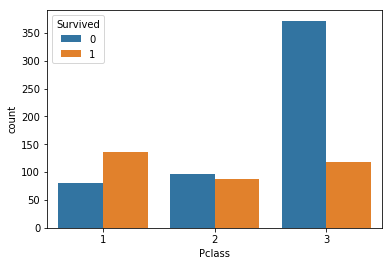

In [10]:
sns.countplot(data = train_data, x = 'Pclass', hue = 'Survived')

As we can see, people in higher class tend to have higher survival change.

In [11]:
# Bucketizes the ticket classes
dummies = pd.get_dummies(combined_data['Pclass'])
dummies.rename(columns = {1:'Upper-class', 2:'Middle-class', 3:'Lower-class'}, inplace = True)
dummies.head()

,Upper-class,Middle-class,Lower-class
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [12]:
combined_data = pd.concat([combined_data, dummies], axis = 1)
combined_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upper-class,Middle-class,Lower-class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


__Name__

Name won't affect our model much, so leave it be.

__Sex__

Women are usually priotizied. Let's see if it's true

In [13]:
# First checks if there is missing values:
check_missing_values(combined_data, 'Sex')

Number of missing values: 0 on 1309 total


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


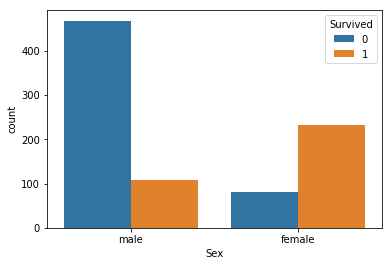

In [14]:
sns.countplot(x = 'Sex', hue = 'Survived', data = train_data)

As we can see, it's cleary women have a higher change of survival than men.<br>
So let's bucketize them.

In [15]:
sex_bucketized = pd.get_dummies(combined_data['Sex'])
sex_bucketized.rename(columns = {'female':'Female', 'male':'Male'}, inplace = True)
sex_bucketized.head()

,Female,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [16]:
combined_data = pd.concat([combined_data, sex_bucketized], axis = 1)
combined_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upper-class,Middle-class,Lower-class,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


In [17]:
# Drops the Sex column
combined_data.drop('Sex', axis = 1, inplace = True)
combined_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upper-class,Middle-class,Lower-class,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


__Age__

The age of the passengers.<br>
Let's see how age affects the change of survival of the passengers.

In [18]:
# First checks for missing value
check_missing_values(combined_data, 'Age')

Number of missing values: 263 on 1309 total


20% of missing values. We may want to replace them by mean. However, that means we have a bunch of people that are on the same age in our dataset, which is unnatural.<br>
So we just need to simply leave the missing values there.<br>
Moreover, bucketize them seems to be a good idea.

In [19]:
# Replaces the missing value by 0
combined_data['Age'].replace(np.nan, 0, inplace = True)
check_missing_values(combined_data, 'Age')

Number of missing values: 0 on 1309 total


In [20]:
# Bucketizes the data
bins = [-1, 0, 16, 30, 50, 70, 100]
names = ['Unknow', 'Children', 'Young adult', 'Adult', 'Senior', 'Elder']
combined_data['Age-binned'] = pd.cut(combined_data['Age'], bins, labels = names, include_lowest = True)
combined_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upper-class,Middle-class,Lower-class,Female,Male,Age-binned
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,Young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,Young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,Adult
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,Adult


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


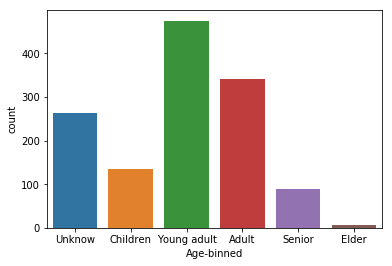

In [21]:
# Counts the number of each bin
sns.countplot(x = 'Age-binned', data = combined_data)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


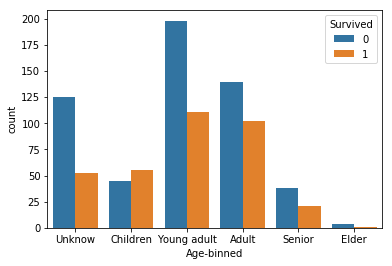

In [22]:
# Let's see if ages affect the change of survival
tmp_train = get_train_data()
tmp_train['Survived'] = pd.to_numeric(tmp_train['Survived'], errors = 'ignore')
sns.countplot(x = 'Age-binned', hue = 'Survived', data = tmp_train)

Looks like the only bin that has the change of survival greater than 1 is 'Children'. <br>

In [23]:
combined_data['Age-binned'] = combined_data['Age-binned'].apply(lambda x: x if x == 'Children' else 'Not children')
combined_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upper-class,Middle-class,Lower-class,Female,Male,Age-binned
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,Not children
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,Not children
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,Not children
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,Not children
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,Not children


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


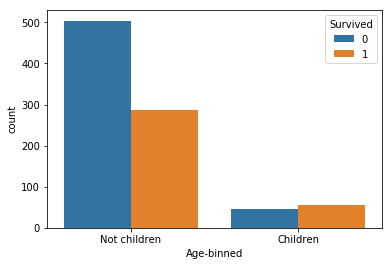

In [24]:
tmp_train = get_train_data()
sns.countplot(x = 'Age-binned', hue = 'Survived', data = tmp_train)

Children has a slightly higher change.

In [25]:
# Bucketizes the age
dummies = pd.get_dummies(combined_data['Age-binned'])
dummies.rename(columns = {'Children':'Is-children', 'Not children':'Is-not-children'})
combined_data = pd.concat([combined_data, dummies], axis = 1)
combined_data.drop('Age-binned', axis = 1, inplace = True)
combined_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upper-class,Middle-class,Lower-class,Female,Male,Children,Not children
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


__SibSp__

The number of siblings of the passenger.<br>


In [26]:
# Checks for missing values
check_missing_values(combined_data, 'SibSp')

Number of missing values: 0 on 1309 total


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


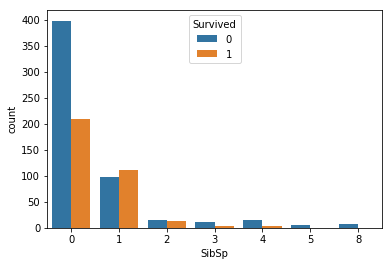

In [27]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = train_data)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


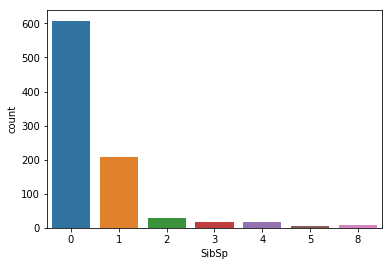

In [28]:
sns.countplot(x = 'SibSp', data = train_data)

Since SibSp doesn't give us much information, we just simply clip them.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


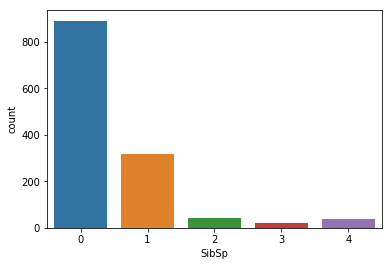

In [29]:
combined_data['SibSp'] = combined_data['SibSp'].apply(lambda x: min(x, 4))
sns.countplot(data = combined_data, x = 'SibSp')

__Parch__

The number of children/parents of the passengers.

In [30]:
# Checks for missing values
check_missing_values(combined_data, 'Parch')

Number of missing values: 0 on 1309 total


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


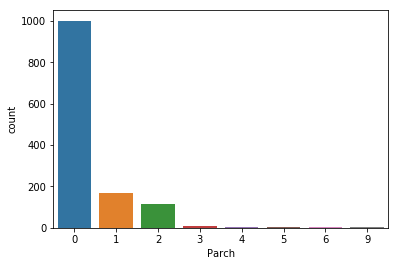

In [31]:
sns.countplot(data = combined_data, x = 'Parch')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


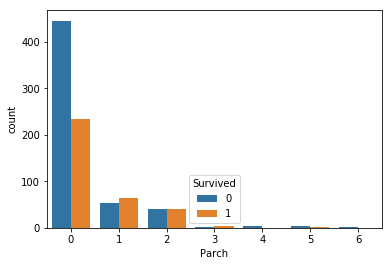

In [32]:
sns.countplot(x = 'Parch', hue = 'Survived', data = train_data)

Let's just clip the data

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


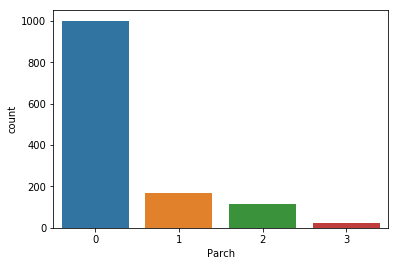

In [33]:
combined_data['Parch'] = combined_data['Parch'].apply(lambda x: min(x, 3))
sns.countplot(data = combined_data, x = 'Parch')

__Ticket__

The ticket code of the passengers.

In [34]:
# Checks for missing values
check_missing_values(combined_data, 'Ticket')

Number of missing values: 0 on 1309 total


On normal judging, ticket codes seem to be irrelevant to survival. So we won't use them.

__Fare__

Passengers fare.<br>
Let's see if Fare presents the price of the ticket class.

In [35]:
# First checks for missing values
check_missing_values(combined_data, 'Fare')

Number of missing values: 1 on 1309 total


In [36]:
# There is 1 missing value. Checks if it's in the train data.
check_missing_values(train_data, 'Fare')

Number of missing values: 0 on 891 total


The missing value is in the test data. We can replace the missing value by the mean of all fare values.<br>
However, if it's correct that Fare represents the price of the ticket class, we can make a better replacement.

In [37]:
import matplotlib
from matplotlib import pyplot as plt

Text(0.5,1,'Ticket class vs Fare')

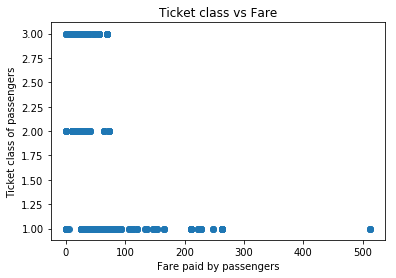

In [38]:
plt.scatter(combined_data['Fare'], combined_data['Pclass'])
plt.xlabel('Fare paid by passengers')
plt.ylabel('Ticket class of passengers')
plt.title('Ticket class vs Fare')

Overall, all the fares that are higher than 100 belong to the first class. So our guess seems to be correct.

In [39]:
# Gets the ticket class of the passenger with missing fare value.
missing_fare = combined_data['Fare'].isnull()
combined_data[np.array(missing_fare)]['Pclass']


152    3
Name: Pclass, dtype: int64

So the class of that passenger is 3. Let's replace the missing fare by the mean of all 3 class fares.

In [40]:
# Gets all 3rd class passengers.
third_class = combined_data['Pclass'] == 3
third_class = combined_data[np.array(third_class)]
third_class.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upper-class,Middle-class,Lower-class,Female,Male,Children,Not children
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1
5,6,0,3,"Moran, Mr. James",0.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,0,0,1,0,1,1,0


In [41]:
# Replace the missing value.
combined_data['Fare'] = combined_data['Fare'].replace(np.nan, third_class['Fare'].mean())

In [42]:
check_missing_values(combined_data, 'Fare')

Number of missing values: 0 on 1309 total


Now let's visualize the Fare vs the change of survival.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


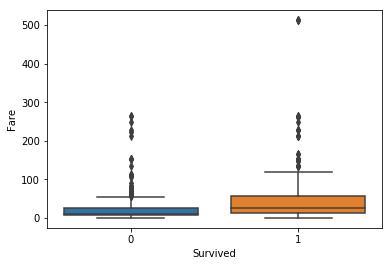

In [43]:
sns.boxplot(data = train_data, x = 'Survived', y = 'Fare')

Seems like fare doesn't affect much on the change of survival.

Text(0,0.5,'Count')

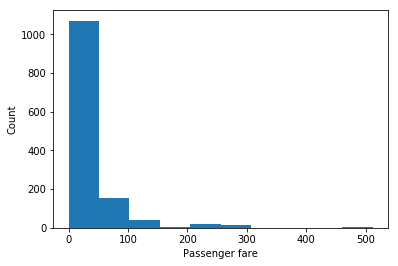

In [44]:
plt.hist(combined_data['Fare'], bins = 10)
plt.xlabel('Passenger fare')
plt.ylabel('Count')

Text(0,0.5,'Count')

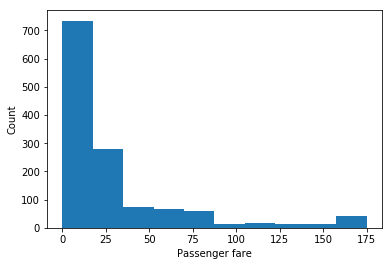

In [45]:
# Let's clip the fares
combined_data['Fare'] = combined_data['Fare'].apply(lambda x: min(x, 175))
plt.hist(combined_data['Fare'], bins = 10)
plt.xlabel('Passenger fare')
plt.ylabel('Count')

In [46]:
# Scale the data
combined_data['Fare'] = combined_data['Fare'].apply(lambda x: x / combined_data['Fare'].max())

Text(0,0.5,'Count')

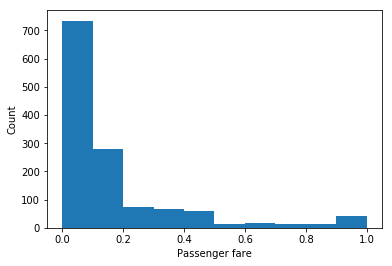

In [47]:
# Let's clip the fares
combined_data['Fare'] = combined_data['Fare'].apply(lambda x: min(x, 175))
plt.hist(combined_data['Fare'], bins = 10)
plt.xlabel('Passenger fare')
plt.ylabel('Count')

__Cabin__

The cabins of the passengers.<br>
First let's take a look at the values.

In [48]:
check_missing_values(combined_data, 'Cabin')

Number of missing values: 1014 on 1309 total


Looks like there are a lot of missing values.<br>
Let's see if we can do anything other than drop the whole column

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


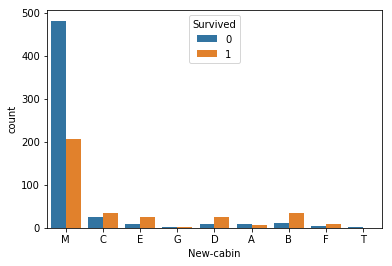

In [49]:
new_cabin = train_data['Cabin'].copy()
new_cabin.replace(np.nan, 'M', inplace = True)
new_cabin = new_cabin.apply(lambda x: x[0])
temp_train_data = train_data.copy()
temp_train_data['New-cabin'] = new_cabin
sns.countplot(data = temp_train_data, x = 'New-cabin', hue = 'Survived')

Looks like the information from the cabin won't help us much. Maybe we will comeback to it later.

__Embarked__

The port of embarkation.

In [50]:
check_missing_values(combined_data, 'Embarked')

Number of missing values: 2 on 1309 total


In [51]:
check_missing_values(train_data, 'Embarked')

Number of missing values: 2 on 891 total


All the missing values are in the train data. Maybe we can replace them by the most frequent value.

In [52]:
combined_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [53]:
combined_data['Embarked'].replace(np.nan, 'S', inplace = True)
check_missing_values(combined_data, 'Embarked')

Number of missing values: 0 on 1309 total


Check if it gives useful information.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


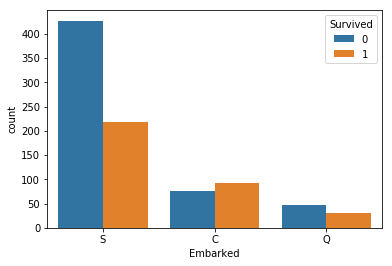

In [54]:
temp_train_data = get_train_data()
sns.countplot(data = temp_train_data, x = 'Embarked', hue = 'Survived')

Based on normal intuition, it seems like the embarkation won't affect our target. However, the graph shows that people embark in 'S' have smaller change to survive. So let's comeback to this later.

# Build a model

Everything is ready. Let's build a model.
Let's take a look at the preprocessed data:

In [55]:
combined_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upper-class,Middle-class,Lower-class,Female,Male,Children,Not children
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,0.041429,NaN,S,0,0,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,0.407333,C85,C,1,0,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,0.045286,NaN,S,0,0,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,0.303429,C123,S,1,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,0.046000,NaN,S,0,0,1,0,1,0,1


In [56]:
combined_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Upper-class,Middle-class,Lower-class,Female,Male,Children,Not children
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,23.877517,0.466769,0.357525,0.174963,0.246753,0.211612,0.541635,0.355997,0.644003,0.102368,0.897632
std,378.020061,0.837836,17.590845,0.862843,0.716066,0.217769,0.431287,0.408607,0.498454,0.478997,0.478997,0.303248,0.303248
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,7.000000,0.000000,0.000000,0.045119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,655.000000,3.000000,24.000000,0.000000,0.000000,0.082595,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,982.000000,3.000000,35.000000,1.000000,0.000000,0.178714,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1309.000000,3.000000,80.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Makes a list of features that we will use
features = ['Fare', 'Upper-class', 'Middle-class', 'Lower-class', 'Female', 'Male', 'Children', 'Not children']

In [58]:
# Creates a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
lr = LinearRegression()

In [59]:
# Gets the train data and test data that we have preocessed
use_train_data = get_train_data()
use_train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upper-class,Middle-class,Lower-class,Female,Male,Children,Not children
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,0.041429,NaN,S,0,0,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,0.407333,C85,C,1,0,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,0.045286,NaN,S,0,0,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,0.303429,C123,S,1,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,0.046000,NaN,S,0,0,1,0,1,0,1


In [60]:
use_train_data.dtypes

PassengerId       int64
Survived         object
Pclass            int64
Name             object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Upper-class       uint8
Middle-class      uint8
Lower-class       uint8
Female            uint8
Male              uint8
Children          uint8
Not children      uint8
dtype: object

In [61]:
use_train_data['Survived'] = pd.to_numeric(use_train_data['Survived'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
use_test_data = get_test_data()
use_test_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upper-class,Middle-class,Lower-class,Female,Male,Children,Not children
0,892,None,3,"Kelly, Mr. James",34.5,0,0,330911,0.044738,NaN,Q,0,0,1,0,1,0,1
1,893,None,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,0.040000,NaN,S,0,0,1,1,0,0,1
2,894,None,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,0.055357,NaN,Q,0,1,0,0,1,0,1
3,895,None,3,"Wirz, Mr. Albert",27.0,0,0,315154,0.049500,NaN,S,0,0,1,0,1,0,1
4,896,None,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,0.070214,NaN,S,0,0,1,1,0,0,1


In [63]:
# Splits the train data into two parts
X_train, X_test, y_train, y_test = train_test_split(use_train_data[features], use_train_data[['Survived']], test_size = 0.15, random_state = 0)

In [64]:
X_train.describe()

,Fare,Upper-class,Middle-class,Lower-class,Female,Male,Children,Not children
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,0.166037,0.233818,0.204756,0.561427,0.350066,0.649934,0.110964,0.889036
std,0.202307,0.423537,0.403790,0.496540,0.477306,0.477306,0.314296,0.314296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.080619,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.175405,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
X_test.describe()

,Fare,Upper-class,Middle-class,Lower-class,Female,Male,Children,Not children
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,0.196674,0.291045,0.216418,0.492537,0.365672,0.634328,0.119403,0.880597
std,0.237426,0.455949,0.413348,0.501820,0.483425,0.483425,0.325479,0.325479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.046000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.103286,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.199286,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
y_train.describe()

,Survived
count,757.000000
mean,0.379128
std,0.485491
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [67]:
y_test.describe()

,Survived
count,134.000000
mean,0.410448
std,0.493761
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [68]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
lr.score(X_test, y_test)

0.38789029614451997

In [93]:
test_model_predictions = lr.predict(X_test)
threshold = 0.5
test_model_predictions = test_model_predictions >= threshold

In [94]:
metrics.accuracy_score(test_model_predictions, y_test)

0.77611940298507465

In [96]:
lr.fit(use_train_data[features], use_train_data['Survived'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
X_predict = use_test_data[features]
y_predictions = lr.predict(X_predict)
y_predictions = y_predictions >= threshold
sth = []
for i in range(0, len(y_predictions)):
    if y_predictions[i]:
        sth.append(1)
    else:
        sth.append(0)

answer = pd.DataFrame()
answer['PassengerId'] = use_test_data['PassengerId'].copy()
answer['Survived'] = sth

answer.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [119]:
from IPython.display import HTML
import base64

def create_download_link( df, title = "Download CSV file", filename = "my_submission.csv"):  
    csv = df.to_csv(index = False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(answer)